The RFM model is a marketing analysis framework used to understand and categorize customer behavior based on three key factors: 1. Recency
2. Frequency, and 
3. Monetary value. 

This model helps businesses segment their customer base to identify different groups of customers with similar characteristics. 

By doing so, businesses can tailor their marketing strategies and efforts to better meet the specific needs of each segment, ultimately improving customer satisfaction and maximizing revenue.

Here's a brief overview of the RFM model components:

Recency (R): This refers to how recently a customer has made a purchase or engaged with the business. Customers who have recently interacted with the brand are often considered more valuable, as their behavior is considered more indicative of their current preferences and needs.

Frequency (F): Frequency measures how often a customer makes purchases or engages with the business over a specific period. Customers who make frequent transactions or interactions are generally considered more loyal and potentially more profitable.

Monetary Value (M): Monetary value represents the total amount of money a customer has spent with the business. This metric helps identify high-value customers who contribute significantly to the overall revenue.

To implement the RFM model, businesses typically assign numerical scores to each of the three dimensions for each customer. These scores can then be used to create customer segments based on common characteristics. For example, a high-recency, high-frequency, and high-monetary-value customer may be classified as a "loyal and valuable" segment.

By understanding these segments, businesses can develop targeted marketing campaigns, promotions, and personalized experiences to cater to the specific needs and preferences of each group. The RFM model is a valuable tool in customer relationship management, helping businesses optimize their marketing strategies and enhance customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding='latin1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

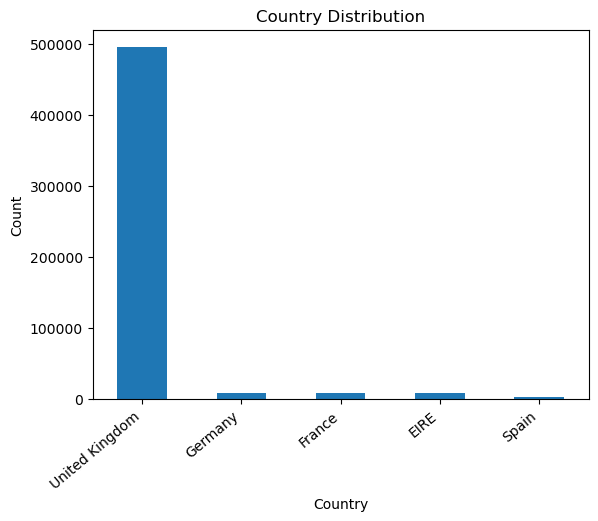

In [5]:
df['Country'].value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count');

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.drop(['StockCode','Description','Country'],axis = 1, inplace =True)


In [8]:
df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,01-12-2010 08:26,2.55,17850.0
1,536365,6,01-12-2010 08:26,3.39,17850.0
2,536365,8,01-12-2010 08:26,2.75,17850.0
3,536365,6,01-12-2010 08:26,3.39,17850.0
4,536365,6,01-12-2010 08:26,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,09-12-2011 12:50,0.85,12680.0
541905,581587,6,09-12-2011 12:50,2.10,12680.0
541906,581587,4,09-12-2011 12:50,4.15,12680.0
541907,581587,4,09-12-2011 12:50,4.15,12680.0


In [9]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.isnull().sum()


InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [11]:
df.dropna(inplace=True)


In [12]:
df.isnull().sum()


InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.count()


InvoiceNo      151429
Quantity       151429
InvoiceDate    151429
UnitPrice      151429
CustomerID     151429
dtype: int64

In [14]:
df.shape

(406829, 5)

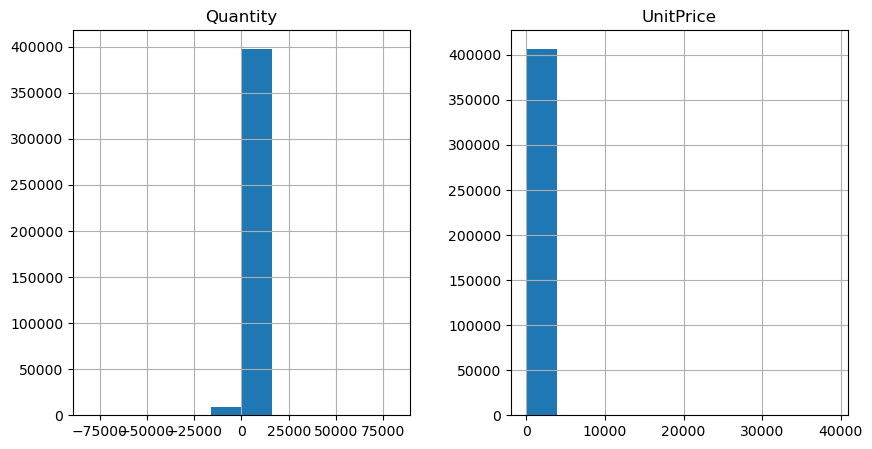

In [15]:
df[['Quantity','UnitPrice']].hist(figsize=(10,5))
plt.show()

In [16]:
# remove outlier 
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

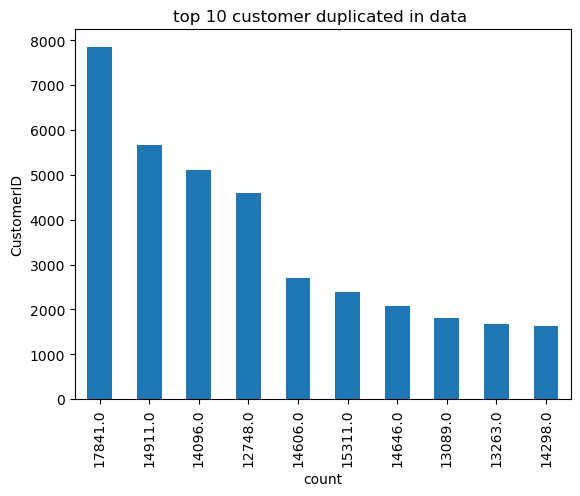

In [17]:
df['CustomerID'].value_counts().nlargest(10).plot(kind='bar')
plt.title('top 10 customer duplicated in data ')
plt.xlabel('count')
plt.ylabel('CustomerID')
plt.show()

In [18]:
df['CustomerID'].value_counts()


CustomerID
17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
18184.0       1
13185.0       1
16073.0       1
17948.0       1
17846.0       1
Name: count, Length: 4338, dtype: int64

In [19]:
un=df['CustomerID'].nunique()
un

4338

# Frist method to creating segmentation for customer

In [20]:
!pip install rfm


In [21]:
from rfm import RFM


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
yearly_counts = df['InvoiceDate'].dt.year.value_counts().sort_index()
month_counts = df['InvoiceDate'].dt.month.value_counts().sort_index()


In [23]:
yearly_counts

InvoiceDate
2010     26157
2011    371727
Name: count, dtype: int64

In [24]:
month_counts

InvoiceDate
1     21229
2     19927
3     27175
4     22642
5     28320
6     27185
7     26825
8     27007
9     40028
10    49554
11    64531
12    43461
Name: count, dtype: int64

In [25]:
df_2=df.copy()


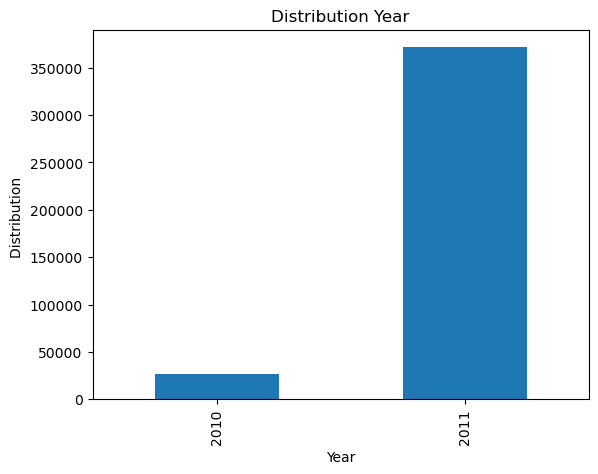

In [26]:
yearly_counts.plot(kind='bar')
plt.title('Distribution Year')
plt.xlabel('Year')
plt.ylabel('Distribution ')
plt.show()


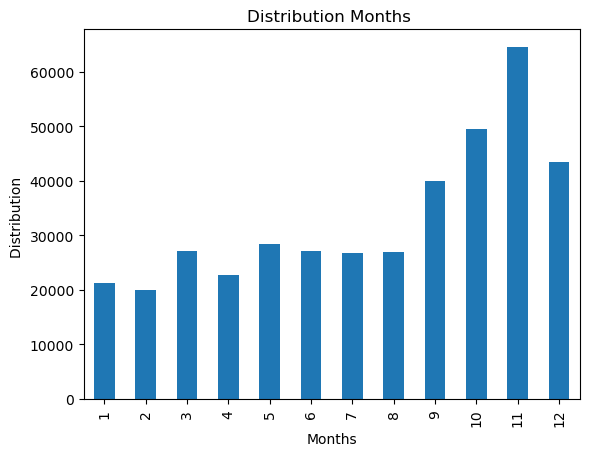

In [27]:
month_counts.plot(kind='bar')
plt.title('Distribution Months ')
plt.xlabel('Months')
plt.ylabel('Distribution ')
plt.show()

In [28]:
r=RFM(df,customer_id='CustomerID',transaction_date='InvoiceDate',amount='UnitPrice')


In [29]:
new_df=r.rfm_table
new_df

,CustomerID,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,16684,3,215,541.31,5,5,5,555,Champions
1,13599,0,179,506.20,5,5,5,555,Champions
2,15373,7,110,590.32,5,5,5,555,Champions
3,17231,11,347,975.08,5,5,5,555,Champions
4,14735,3,133,464.48,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,15732,211,9,16.11,1,1,1,111,Lost
4334,15733,282,7,30.80,1,1,1,111,Lost
4335,17291,307,1,7.65,1,1,1,111,Lost
4336,13551,318,2,18.70,1,1,1,111,Lost


In [30]:
new_df['segment'].value_counts()


segment
Champions              984
Loyal Accounts         812
Lost                   657
At Risk                643
About to Sleep         425
Potential Loyalist     381
Low Spenders           325
New Active Accounts     52
Promising               41
Need Attention          18
Name: count, dtype: int64

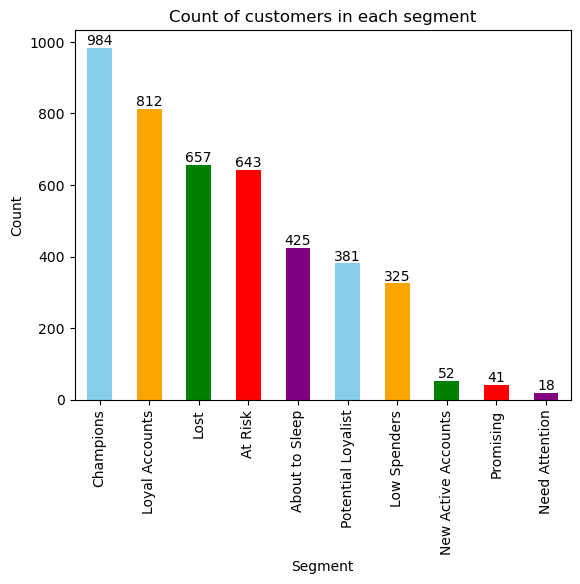

In [31]:
segment_counts = new_df['segment'].value_counts()
colors = ['skyblue', 'orange', 'green', 'red', 'purple']  # Add more colors if needed

bf = segment_counts.plot(kind='bar', color=colors)
for p in bf.patches:
    bf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Count of customers in each segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()


In [32]:
df_2['InvoiceNo'] = df_2['InvoiceNo'].astype(str)
df_2['Quantity'] = pd.to_numeric(df_2['Quantity'], errors='coerce')  # 'coerce' will set non-numeric values to NaN
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate'], format='%m-%d-%Y %H:%M', errors='coerce')
df_2['UnitPrice'] = pd.to_numeric(df_2['UnitPrice'], errors='coerce')
df_2['CustomerID'] = df_2['CustomerID'].astype('Int64')

In [33]:
df_2

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850
1,536365,6,2010-12-01 08:26:00,3.39,17850
2,536365,8,2010-12-01 08:26:00,2.75,17850
3,536365,6,2010-12-01 08:26:00,3.39,17850
4,536365,6,2010-12-01 08:26:00,3.39,17850
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680
541905,581587,6,2011-12-09 12:50:00,2.10,12680
541906,581587,4,2011-12-09 12:50:00,4.15,12680
541907,581587,4,2011-12-09 12:50:00,4.15,12680


# Second method to creating Segmentation

date
Recency (R)

What is a Recency
Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value.

ex: when you clauc this if you start data from 1/1/2023 and we did segment today R= last transaction - today()¶

In [34]:
df_2['InvoiceDate'] = pd.to_datetime(df_2['InvoiceDate']).dt.date


In [35]:
df_2['InvoiceDate']


0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 397884, dtype: object

In [36]:
df_2['InvoiceDate'].max(),df_2['InvoiceDate'].min()


(datetime.date(2011, 12, 9), datetime.date(2010, 12, 1))

In [37]:
last_transaction_date = df_2.groupby('CustomerID')['InvoiceDate'].max()


In [38]:
last_transaction_date


CustomerID
12346    2011-01-18
12347    2011-12-07
12348    2011-09-25
12349    2011-11-21
12350    2011-02-02
            ...    
18280    2011-03-07
18281    2011-06-12
18282    2011-12-02
18283    2011-12-06
18287    2011-10-28
Name: InvoiceDate, Length: 4338, dtype: object

In [39]:
last_transaction_date = df_2.groupby('CustomerID')['InvoiceDate'].max()

# Set the reference date as 2011-12-10
reference_date = pd.to_datetime('2011-12-10')

last_transaction_date = pd.to_datetime(last_transaction_date)

days_difference = (reference_date - last_transaction_date).dt.days

print(days_difference)

CustomerID
12346    326
12347      3
12348     76
12349     19
12350    311
        ... 
18280    278
18281    181
18282      8
18283      4
18287     43
Name: InvoiceDate, Length: 4338, dtype: int64


In [40]:
days_difference.max(),days_difference.min()


(374, 1)

# count of unique customer 4338
Frequency (F)
the total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10

In [41]:
data = df_2.groupby('CustomerID').agg({
    'CustomerID': 'count',   # Count the unique InvoiceNo per customer (number of orders)
})

data_frequency = data.rename(columns={'CustomerID': 'OrderCount'})

data_frequency = data_frequency.sort_values(by='OrderCount', ascending=False)

print(data_frequency)

            OrderCount
CustomerID            
17841             7847
14911             5675
14096             5111
12748             4595
14606             2700
...                ...
17846                1
13017                1
13099                1
13106                1
12346                1

[4338 rows x 1 columns]


In [42]:
df_2.dtypes


InvoiceNo       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       Int64
dtype: object

# Monetary (M)¶
total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Simply total up the money from all transactions to get the M value

In [43]:
data_monetary = df_2.groupby('CustomerID').agg({
    'UnitPrice': 'sum'        
})

data_monetary = data_monetary.rename(columns={'UnitPrice': 'TotalUnitPrice'})
data_monetary = data_monetary.sort_values(by='TotalUnitPrice', ascending=False)

print(data_monetary)

            TotalUnitPrice
CustomerID                
14096             33332.45
14911             26185.72
17841             19848.49
12744             12949.99
12748             12205.60
...                    ...
17752                 0.42
13366                 0.39
12875                 0.34
18084                 0.29
15118                 0.17

[4338 rows x 1 columns]


In [44]:
final_data = pd.DataFrame({
    'Recency': days_difference,
    'Frequency': data_frequency['OrderCount'],
    'Monetary': data_monetary['TotalUnitPrice']
})

final_data

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,1.04
12347,3,182,481.21
12348,76,31,178.71
12349,19,73,605.10
12350,311,17,65.30
...,...,...,...
18280,278,10,47.65
18281,181,7,39.36
18282,8,12,62.39


In [45]:
final_data.describe(include='all')


,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,91.720609,285.846154
std,100.012264,228.785094,880.636531
min,1.000000,1.000000,0.170000
25%,18.000000,17.000000,51.725000
50%,51.000000,41.000000,127.290000
75%,142.750000,100.000000,294.452500
max,374.000000,7847.000000,33332.450000


In [46]:
final_data=final_data[final_data['Recency']<400]


In [47]:
final_data=final_data[final_data['Frequency']<600]


In [48]:
final_data=final_data[final_data['Monetary']<3000]


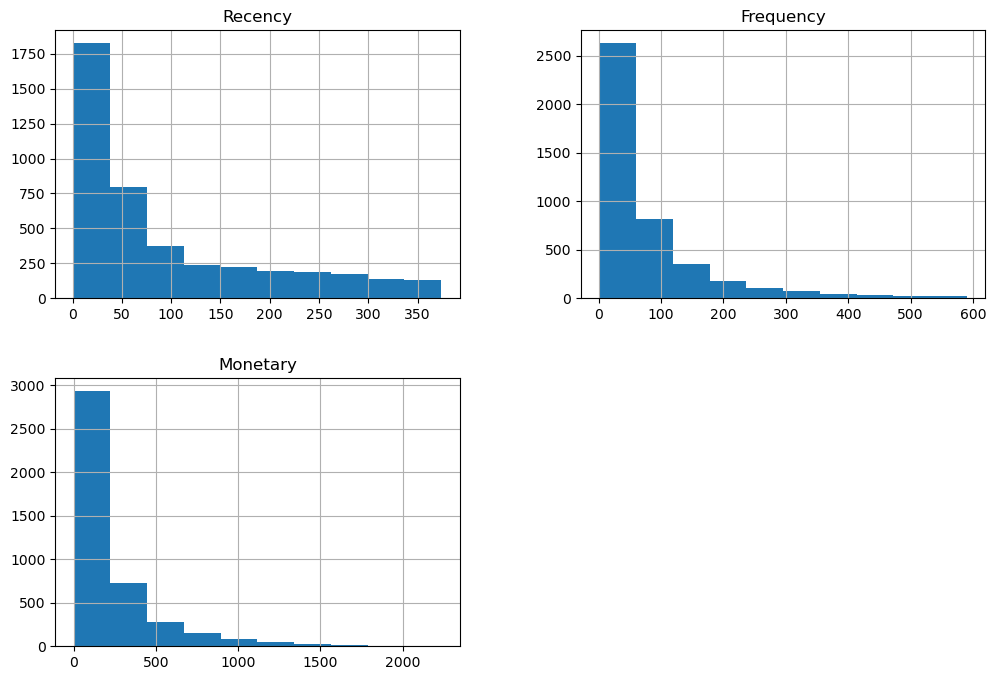

In [49]:
final_data.hist(figsize=(12,8))
plt.show()

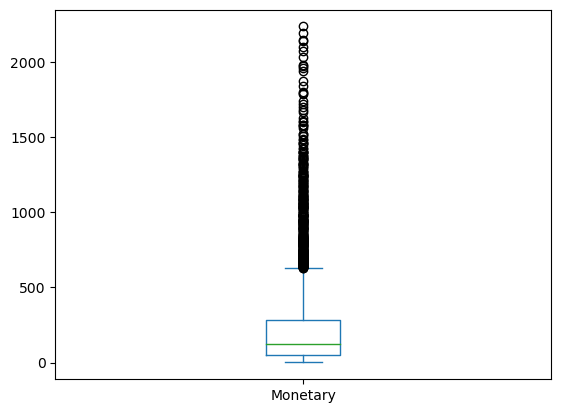

In [50]:
final_data['Monetary'].plot(kind='box')
plt.show()

In [51]:
RFM_table=final_data


# Segmention By Quantiles

In [52]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,19.0,17.0,50.7825
0.50,52.0,40.0,124.4500
0.75,145.0,97.0,282.6850


In [53]:
RFM_Segment = RFM_table.copy()

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


In [54]:
RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency', quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency', quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(FM_Class, args=('Monetary', quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

# RFM segmentation readily answers these questions for your business…
## Who are my best customers?
## Which customers are at the verge of churning?
## Who are lost customers that you don’t need to pay much attention to?
## Who are your loyal customers?
## Which customers you must retain?
## Who has the potential to be converted into more profitable customers?
## Which group of customers is most likely to respond to your current campaign?
'1' Who are my best customers?

In [55]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14180,11,240,2234.69,4,4,4,444
18109,2,444,2189.03,4,4,4,444
15023,4,562,2147.48,4,4,4,444
14895,8,498,2073.61,4,4,4,444
12471,3,460,1978.17,4,4,4,444
12682,4,525,1968.83,4,4,4,444
14194,5,579,1961.24,4,4,4,444
18102,1,431,1940.92,4,4,4,444
17139,16,478,1799.41,4,4,4,444


# '2' Which customers are at the verge of churning?

In [56]:
RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12359,58,248,2137.86,2,4,4,244
17846,86,1,2033.10,2,1,4,214
16984,89,407,1425.53,2,4,4,244
12669,151,101,1387.88,1,4,4,144
15098,183,3,1303.95,1,1,4,114
17337,152,543,1247.40,1,4,4,144
17850,373,297,1176.23,1,4,4,144
15834,71,273,1110.97,2,4,4,244
14573,180,235,1041.79,1,4,4,144


# 3. Who are the lost customers?

In [57]:
RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(10)


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
17643,374,8,32.15,1,1,1,111
15350,374,5,13.35,1,1,1,111
13747,374,1,9.95,1,1,1,111
12791,374,2,16.85,1,1,1,111
16048,374,8,12.97,1,1,1,111
16583,374,14,35.90,1,1,1,111
15922,374,11,48.50,1,1,1,111
13011,373,3,12.65,1,1,1,111
17925,373,1,3.39,1,1,1,111


# Who are loyal customers?

In [58]:
RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(10)


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
14180,11,240,2234.69,4,4,4,444
18109,2,444,2189.03,4,4,4,444
15023,4,562,2147.48,4,4,4,444
12359,58,248,2137.86,2,4,4,244
15044,20,453,2098.69,3,4,4,344
14895,8,498,2073.61,4,4,4,444
12471,3,460,1978.17,4,4,4,444
12682,4,525,1968.83,4,4,4,444
14194,5,579,1961.24,4,4,4,444


# Segmentation using unsupervised learning, particularly K-means clustering

In [59]:
final_data = final_data


In [60]:
# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(final_data)

In [61]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)


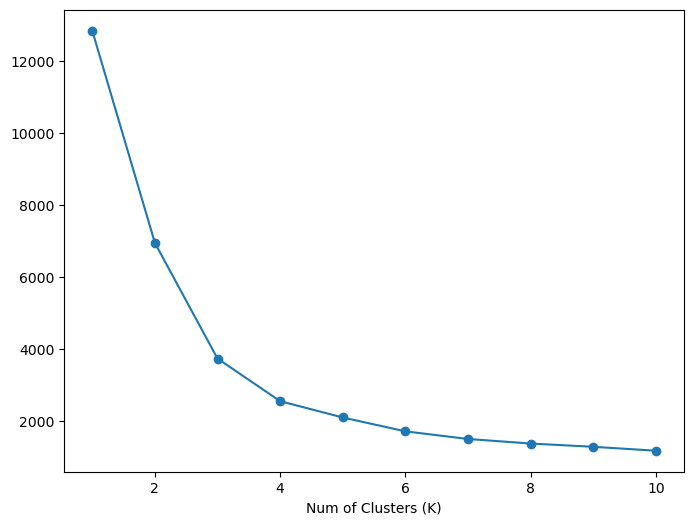

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Num of Clusters (K)')
plt.show()


In [63]:
k = 4

cluster_models = {}
for col in range(rfm_scaled.shape[1]):
    column_data = rfm_scaled[:, col].reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(column_data)
    cluster_models[col] = kmeans
    final_data[f'Cluster_{col}'] = clusters

In [64]:
overall_clusters = [tuple(clusters) for clusters in zip(*[final_data[f'Cluster_{col}'] for col in range(rfm_scaled.shape[1])])]

final_data_with_clusters = final_data.copy()

final_data_with_clusters['Overall_Cluster'] = overall_clusters

for col in range(rfm_scaled.shape[1]):
    final_data_with_clusters.rename(columns={f'Cluster_{col}': f'cluster_R{col}'}, inplace=True)

for col in range(rfm_scaled.shape[1]):
    print(f'Cluster counts for column {col}:')
    print(final_data_with_clusters[f'cluster_R{col}'].value_counts())
    print()


Cluster counts for column 0:
cluster_R0
1    2206
0     977
3     598
2     497
Name: count, dtype: int64

Cluster counts for column 1:
cluster_R1
3    2744
0    1015
2     371
1     148
Name: count, dtype: int64

Cluster counts for column 2:
cluster_R2
0    2675
3    1060
2     409
1     134
Name: count, dtype: int64



In [65]:
final_data_with_clusters.rename(columns={
    'cluster_R0': 'Recency_cluster',
    'cluster_R1': 'Frequency_cluster',
    'cluster_R2': 'Monetary_cluster'
}, inplace=True)


In [66]:
final_data_with_clusters


,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster
CustomerID,,,,,,,
12346,326,1,1.04,2,3,0,"(2, 3, 0)"
12347,3,182,481.21,1,2,3,"(1, 2, 3)"
12348,76,31,178.71,0,3,0,"(0, 3, 0)"
12349,19,73,605.10,1,0,2,"(1, 0, 2)"
12350,311,17,65.30,2,3,0,"(2, 3, 0)"
...,...,...,...,...,...,...,...
18278,74,9,29.55,0,3,0,"(0, 3, 0)"
18280,278,10,47.65,2,3,0,"(2, 3, 0)"
18281,181,7,39.36,3,3,0,"(3, 3, 0)"


In [67]:
final_data_with_clusters['RFM_Score'] = final_data_with_clusters['Recency_cluster'].astype(str) + final_data_with_clusters['Frequency_cluster'].astype(str) + final_data_with_clusters['Monetary_cluster'].astype(str)

In [68]:
final_data_with_clusters

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster,RFM_Score
CustomerID,,,,,,,,
12346,326,1,1.04,2,3,0,"(2, 3, 0)",230
12347,3,182,481.21,1,2,3,"(1, 2, 3)",123
12348,76,31,178.71,0,3,0,"(0, 3, 0)",030
12349,19,73,605.10,1,0,2,"(1, 0, 2)",102
12350,311,17,65.30,2,3,0,"(2, 3, 0)",230
...,...,...,...,...,...,...,...,...
18278,74,9,29.55,0,3,0,"(0, 3, 0)",030
18280,278,10,47.65,2,3,0,"(2, 3, 0)",230
18281,181,7,39.36,3,3,0,"(3, 3, 0)",330


In [69]:
final_data_with_clusters = final_data_with_clusters

final_data_with_clusters['RFM_Score'] = final_data_with_clusters['Recency_cluster'] * 100 + final_data_with_clusters['Frequency_cluster'] * 10 + final_data_with_clusters['Monetary_cluster']

segments = [
    (final_data_with_clusters['RFM_Score'] > 200, 'Champions'),
    ((final_data_with_clusters['RFM_Score'] >= 100) & (final_data_with_clusters['RFM_Score'] <= 200), 'Loyal Accounts'),
    ((final_data_with_clusters['RFM_Score'] >= 30) & (final_data_with_clusters['RFM_Score'] < 100), 'At Risk'),
    ((final_data_with_clusters['RFM_Score'] >= 20) & (final_data_with_clusters['RFM_Score'] < 30), 'About to Sleep'),
    ((final_data_with_clusters['RFM_Score'] >= 10) & (final_data_with_clusters['RFM_Score'] < 20), 'Potential Loyalist'),
    ((final_data_with_clusters['RFM_Score'] >= 3) & (final_data_with_clusters['RFM_Score'] < 10), 'Low Spenders'),
    ((final_data_with_clusters['RFM_Score'] >= 2) & (final_data_with_clusters['RFM_Score'] < 3), 'New Active Accounts'),
    ((final_data_with_clusters['RFM_Score'] == 1), 'Promising'),
    ((final_data_with_clusters['RFM_Score'] == 0), 'Need Attention')
]

for condition, segment in segments:
    final_data_with_clusters.loc[condition, 'Segment'] = segment

final_data_with_clusters


,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster,RFM_Score,Segment
CustomerID,,,,,,,,,
12346,326,1,1.04,2,3,0,"(2, 3, 0)",230,Champions
12347,3,182,481.21,1,2,3,"(1, 2, 3)",123,Loyal Accounts
12348,76,31,178.71,0,3,0,"(0, 3, 0)",30,At Risk
12349,19,73,605.10,1,0,2,"(1, 0, 2)",102,Loyal Accounts
12350,311,17,65.30,2,3,0,"(2, 3, 0)",230,Champions
...,...,...,...,...,...,...,...,...,...
18278,74,9,29.55,0,3,0,"(0, 3, 0)",30,At Risk
18280,278,10,47.65,2,3,0,"(2, 3, 0)",230,Champions
18281,181,7,39.36,3,3,0,"(3, 3, 0)",330,Champions


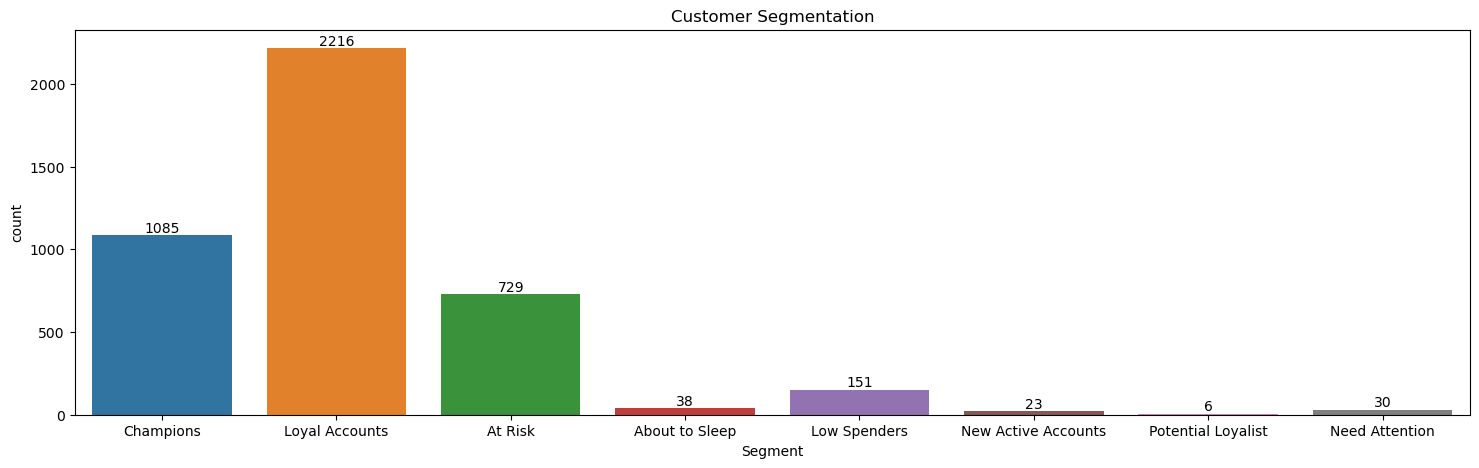

In [70]:
plt.figure(figsize=(18, 5))
ax = sns.countplot(x='Segment', data=final_data_with_clusters)
plt.title('Customer Segmentation')

# Add count labels above the columns
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()